
<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Electrical Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 <br>
<font color=696880 size=4>
<!-- <br> -->


____

# Personal Data

In [1]:
student_number = '99102072'
first_name = 'Omid'
last_name = 'Keshavarz'

# Introduction

In this assignment, we will be performing clustering on Spotify songs.

# Data Preprocessing

In the next cell, import the libraries you'll need.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-3-6d2faa5c098f>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_relevant_data['cluster'] = kmeans.fit_predict(spotify_features_scaled)


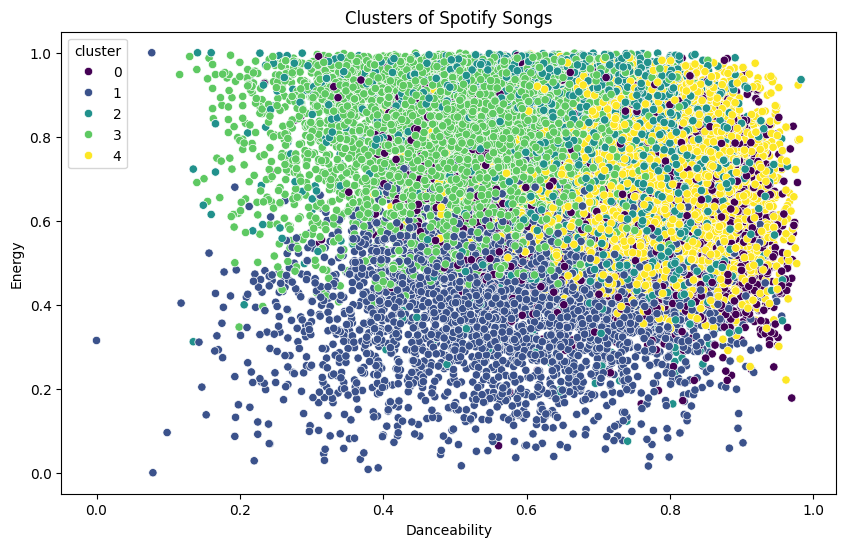

Clustering completed. The clustered data is saved to 'spotify_clustered.csv'.


In [3]:
# TODO: Write your code here
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
file_path = './spotify.csv'
spotify_data = pd.read_csv(file_path)

# Identify numeric columns for clustering, excluding non-relevant columns
numeric_columns = spotify_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Exclude columns that are not relevant for clustering
irrelevant_columns = ['track_id', 'track_popularity', 'track_album_id', 'duration_ms']
relevant_columns = [col for col in numeric_columns if col not in irrelevant_columns]

# Include 'track_name' for reference
relevant_columns.insert(0, 'track_name')

# Select the relevant columns
spotify_relevant_data = spotify_data[relevant_columns]

# Normalize the features
scaler = StandardScaler()
spotify_features = spotify_relevant_data.drop('track_name', axis=1)
spotify_features_scaled = scaler.fit_transform(spotify_features)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
spotify_relevant_data['cluster'] = kmeans.fit_predict(spotify_features_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=spotify_relevant_data['danceability'], y=spotify_relevant_data['energy'], hue=spotify_relevant_data['cluster'], palette='viridis')
plt.title('Clusters of Spotify Songs')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

# Save the clustered data to a new CSV file
output_file_path = '/spotify_clustered.csv'
spotify_relevant_data.to_csv(output_file_path, index=False)

print("Clustering completed. The clustered data is saved to 'spotify_clustered.csv'.")


In [5]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# Load the data from the CSV file
file_path = './spotify.csv'
spotify_data = pd.read_csv(file_path)

# Identify numeric columns for analysis, excluding non-relevant columns
numeric_columns = spotify_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
irrelevant_columns = ['track_id', 'track_popularity', 'track_album_id', 'duration_ms']
relevant_columns = [col for col in numeric_columns if col not in irrelevant_columns]

# Extract the relevant features
spotify_features = spotify_data[relevant_columns]

# Apply variance thresholding to select features with variance above the threshold
threshold = 0.01
selector = VarianceThreshold(threshold=threshold)
selector.fit(spotify_features)

# Get the columns that pass the variance threshold
selected_columns = spotify_features.columns[selector.get_support()].tolist()

print("Most relevant columns based on variance thresholding:")
print(selected_columns)

# Include 'track_name' for reference
selected_columns.insert(0, 'track_name')

# Select the relevant columns
spotify_relevant_data = spotify_data[selected_columns]

# Save the selected columns to a new CSV file
output_file_path = './spotify_relevant_columns.csv'
spotify_relevant_data.to_csv(output_file_path, index=False)

print("Relevant columns data is saved to 'spotify_relevant_columns.csv'.")


Most relevant columns based on variance thresholding:
['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
Relevant columns data is saved to 'spotify_relevant_columns.csv'.


In the `spotify.csv` file, load the data. Exclude unrelated features and retain only the track name and the features you believe are relevant.

In [6]:
# TODO: Write your code here
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the data from the CSV file
file_path = './spotify.csv'
spotify_data = pd.read_csv(file_path)

# Display the columns to understand the structure
print("Columns in the dataset:", spotify_data.columns)

# Identify numeric columns for analysis, excluding non-relevant columns
numeric_columns = spotify_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
irrelevant_columns = ['track_id', 'track_popularity', 'track_album_id', 'duration_ms']

# Exclude non-relevant columns
relevant_columns = [col for col in numeric_columns if col not in irrelevant_columns]

# Include 'track_name' for reference
relevant_columns.insert(0, 'track_name')

# Select the relevant columns
spotify_relevant_data = spotify_data[relevant_columns]

# Display the first few rows of the preprocessed data
print("Relevant data preview:")
print(spotify_relevant_data.head())

# Normalize the features
scaler = StandardScaler()
spotify_features = spotify_relevant_data.drop('track_name', axis=1)
spotify_features_scaled = scaler.fit_transform(spotify_features)

# Add the scaled features back to the dataframe for reference
spotify_relevant_data[spotify_features.columns] = spotify_features_scaled

# Display the first few rows of the normalized data
print("Normalized data preview:")
print(spotify_relevant_data.head())

# Save the preprocessed and normalized data to a new CSV file
output_file_path = './spotify_relevant_normalized.csv'
spotify_relevant_data.to_csv(output_file_path, index=False)

print("Preprocessed and normalized data is saved to 'spotify_relevant_normalized.csv'.")


Columns in the dataset: Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')
Relevant data preview:
                                          track_name  danceability  energy  \
0  I Don't Care (with Justin Bieber) - Loud Luxur...         0.748   0.916   
1                    Memories - Dillon Francis Remix         0.726   0.815   
2                    All the Time - Don Diablo Remix         0.675   0.931   
3                  Call You Mine - Keanu Silva Remix         0.718   0.930   
4            Someone You Loved - Future Humans Remix         0.650   0.833   

   key  loudness  mode  speechiness  acousticness  instrumentalness  

<ipython-input-6-efab7591173c>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_relevant_data[spotify_features.columns] = spotify_features_scaled


Preprocessed and normalized data is saved to 'spotify_relevant_normalized.csv'.


In this cell, you should implement a standard scalar function from scratch and applying it to your data. Explian importance behind using a standard scalar and the potential complications that could arise in clustering if it's not employed. (you can't use `sklearn.preprocessing.StandardScaler` but you are free to use `sklearn.preprocessing.LabelEncoder`)

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the CSV data
data = pd.read_csv('spotify.csv')

# Function to scale the data
def standard_scaler(data):
    # Identify categorical columns and encode them
    label_encoders = {}
    for column in data.columns:
        if data[column].dtype == 'object':
            label_encoders[column] = LabelEncoder()
            data[column] = label_encoders[column].fit_transform(data[column])

    # Select only numeric columns
    numeric_data = data.select_dtypes(include=[np.number])

    # Compute mean and standard deviation for each numeric column
    means = numeric_data.mean(axis=0)
    stds = numeric_data.std(axis=0)

    # Standardize each numeric column
    standardized_data = (numeric_data - means) / stds

    # Replace the scaled numeric values back into the original dataframe
    data[numeric_data.columns] = standardized_data

    return data, label_encoders

# Apply standard scaler function to your data
scaled_data, encoders = standard_scaler(data)

# Example of how to use the scaled data
print(scaled_data.head())

# Example of how to use the encoders
for column, encoder in encoders.items():
    print(f"Label Encoder for {column}: {encoder}")

# Explain the importance of using standard scaler


   track_id  track_name  track_artist  track_popularity  track_album_id  \
0  1.212509   -0.413856     -0.810832          0.941517       -0.464585   
1 -1.361415    0.123436      0.252901          0.981542        0.984521   
2 -0.853929   -1.596730      1.648446          1.101619       -1.145242   
3  1.401565   -1.285806      1.261546          0.701364       -0.915384   
4 -1.004295    0.922996      0.033196          1.061593        1.643499   

   track_album_name  track_album_release_date  playlist_name  playlist_id  \
0         -0.377314                  0.946231       0.524391     0.009537   
1          0.111742                  1.075215       0.524391     0.009537   
2         -1.536812                  0.960805       0.524391     0.009537   
3         -1.219695                  0.970279       0.524391     0.009537   
4          0.887132                  0.877002       0.524391     0.009537   

   playlist_genre  ...       key  loudness      mode  speechiness  \
0       -0.259072

# Dimensionality Reduction

One method for dimensionality reduction is Principal Component Analysis (PCA). Use its implementation from the `sklearn` library to reduce the dimensions of your data. Then, by using an appropriate cut-off for the `_explained_variance_ratio_` in the PCA algorithm, determine the number of principal components to retain.

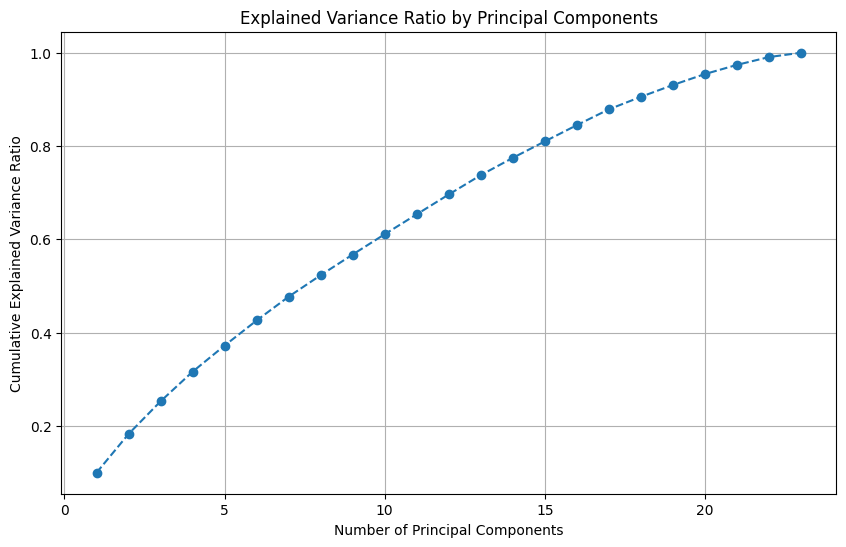

Number of principal components to retain: 20


In [10]:
# TODO: Write your code here
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the CSV data
data = pd.read_csv('./spotify.csv')

# Function to scale the data (using the previously defined function)
def standard_scaler(data):
    # Identify categorical columns and encode them (if needed)
    label_encoders = {}
    for column in data.columns:
        if data[column].dtype == 'object':
            label_encoders[column] = LabelEncoder()
            data[column] = label_encoders[column].fit_transform(data[column])

    # Select only numeric columns
    numeric_data = data.select_dtypes(include=[np.number])

    # Compute mean and standard deviation for each numeric column
    means = numeric_data.mean(axis=0)
    stds = numeric_data.std(axis=0)

    # Standardize each numeric column
    standardized_data = (numeric_data - means) / stds

    # Replace the scaled numeric values back into the original dataframe
    data[numeric_data.columns] = standardized_data

    return data, label_encoders

# Apply standard scaler function to your data
scaled_data, encoders = standard_scaler(data)

# Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_),
         marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

# Determine number of components to retain based on explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
for i, variance_ratio in enumerate(cumulative_variance_ratio):
    if variance_ratio >= 0.95:  # Adjust this threshold as needed
        n_components = i + 1
        print(f"Number of principal components to retain: {n_components}")
        break


# Clustering

Implement K-means for clustering from scratch.

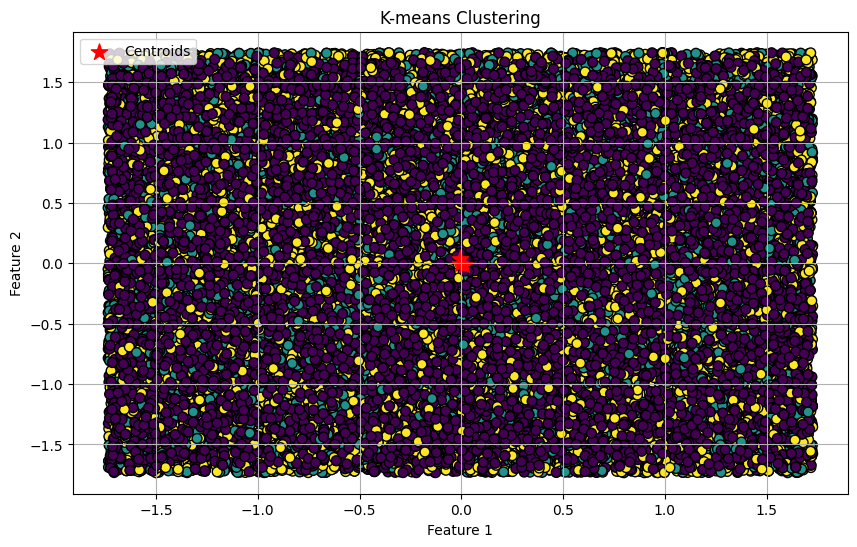

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the CSV data
data = pd.read_csv('spotify.csv')

# Function to preprocess data (including encoding categorical variables)
def preprocess_data(data):
    # Encode categorical variables if present
    label_encoders = {}
    for column in data.columns:
        if data[column].dtype == 'object':
            label_encoders[column] = LabelEncoder()
            data[column] = label_encoders[column].fit_transform(data[column])

    # Scale numeric features if needed (using StandardScaler)
    scaler = StandardScaler()
    data[data.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(data.select_dtypes(include=[np.number]))

    return data, label_encoders, scaler

# Preprocess the data
processed_data, encoders, scaler = preprocess_data(data)

# Implementing K-means clustering
class KMeans:
    def __init__(self, k=3, max_iters=100, random_state=None):
        self.k = k  # Number of clusters
        self.max_iters = max_iters  # Maximum number of iterations
        self.random_state = random_state  # Seed for centroid initialization
        self.centroids = []  # List to store centroids

    def fit(self, X):
        # Initialize centroids randomly
        np.random.seed(self.random_state)
        idx = np.random.choice(len(X), self.k, replace=False)
        self.centroids = X[idx]

        # Initialize clusters and distances
        clusters = [[] for _ in range(self.k)]
        distances = np.zeros((len(X), self.k))

        for _ in range(self.max_iters):
            # Assign points to closest centroid
            for i, x in enumerate(X):
                distances[i] = [euclidean_distance(x, centroid) for centroid in self.centroids]
                cluster = np.argmin(distances[i])
                clusters[cluster].append(i)

            # Update centroids
            for j in range(self.k):
                if clusters[j]:
                    self.centroids[j] = np.mean(X[clusters[j]], axis=0)

        self.labels_ = self.predict(X)
        return self

    def predict(self, X):
        distances = np.zeros((len(X), self.k))
        for i, x in enumerate(X):
            distances[i] = [euclidean_distance(x, centroid) for centroid in self.centroids]
        return np.argmin(distances, axis=1)

# Convert processed data to numpy array for clustering
X = processed_data.values

# Initialize and fit K-means
kmeans = KMeans(k=3, max_iters=100, random_state=42)
kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

# Plotting the clusters (example with first two principal components)
# Replace with appropriate features for visualization
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='*', c='r', s=150, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


Using the function you've created to execute the K-means algorithm eight times on your data, with the number of clusters ranging from 2 to 9. For each run, display the genre of each cluster using the first two principal components in a plot.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

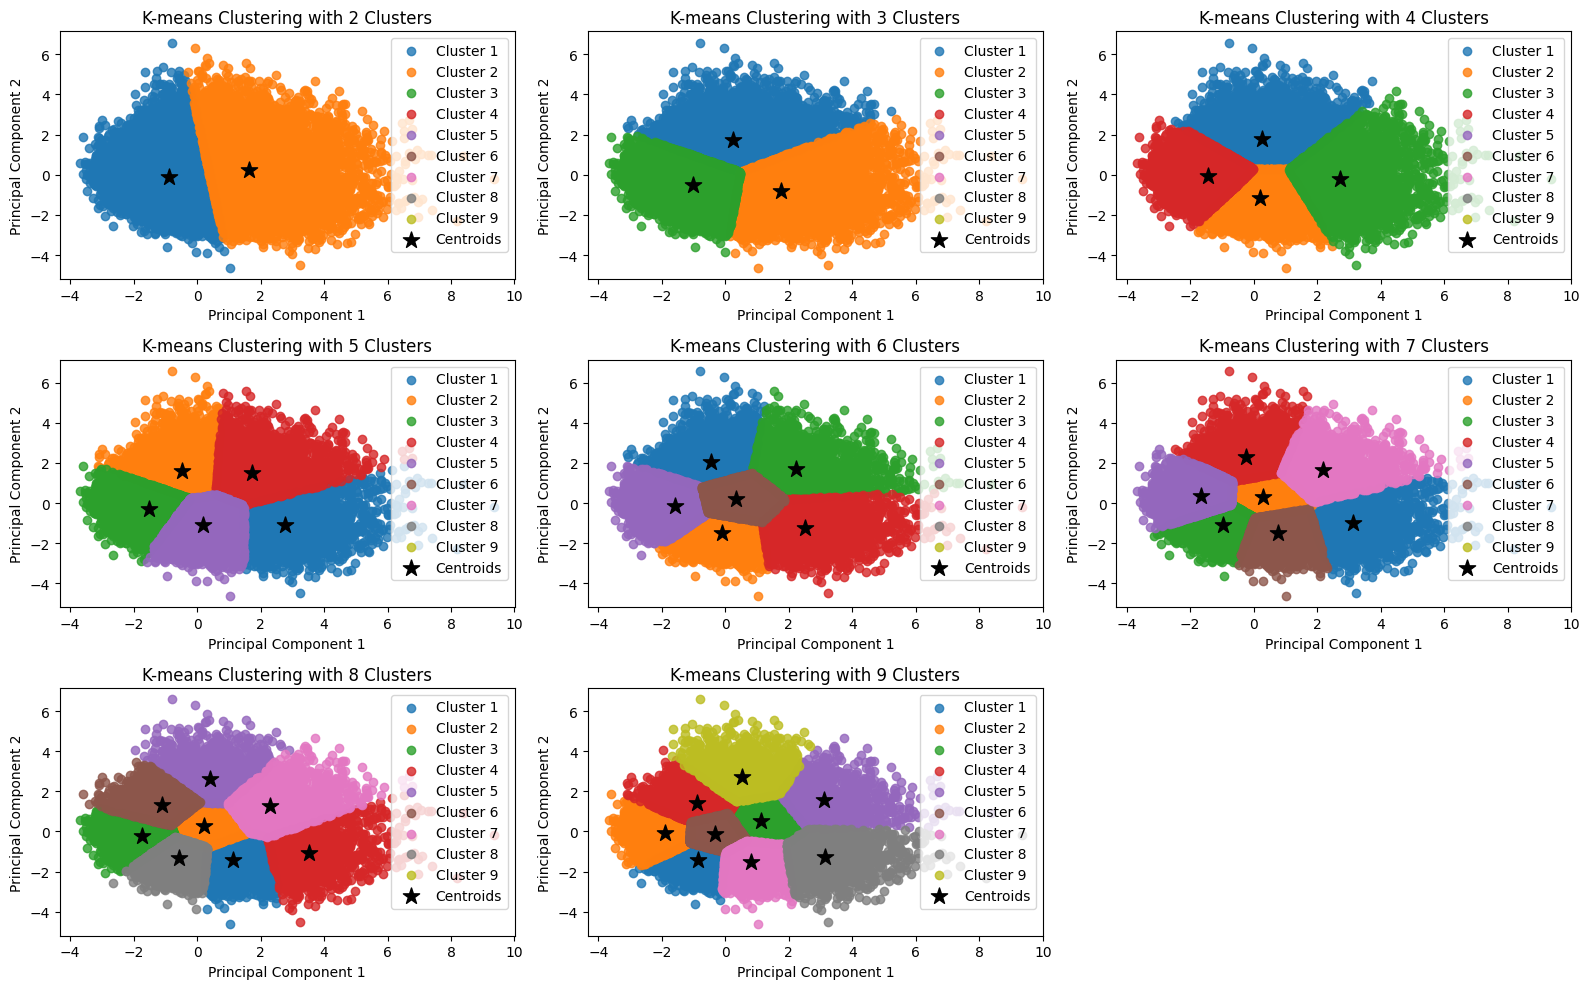

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the CSV data
data = pd.read_csv('spotify.csv')

# Function to preprocess data (including encoding categorical variables)
def preprocess_data(data):
    # Encode categorical variables if present
    label_encoders = {}
    for column in data.columns:
        if data[column].dtype == 'object':
            label_encoders[column] = LabelEncoder()
            data[column] = label_encoders[column].fit_transform(data[column])

    # Scale numeric features if needed (using StandardScaler)
    scaler = StandardScaler()
    data[data.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(data.select_dtypes(include=[np.number]))

    return data, label_encoders, scaler

# Preprocess the data
processed_data, encoders, scaler = preprocess_data(data)

# Extract features for clustering (assuming first two principal components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(processed_data)

# Perform K-means clustering for each number of clusters (2 to 9)
num_clusters_range = range(2, 10)
cluster_results = []

for k in num_clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    cluster_labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    cluster_results.append((cluster_labels, cluster_centers))

# Plotting clusters with genre information
plt.figure(figsize=(16, 10))

for i, (cluster_labels, cluster_centers) in enumerate(cluster_results, start=1):
    plt.subplot(3, 3, i)
    for cluster in range(k):
        plt.scatter(X_pca[cluster_labels == cluster, 0],
                    X_pca[cluster_labels == cluster, 1],
                    label=f'Cluster {cluster + 1}',
                    alpha=0.8)
    plt.scatter(cluster_centers[:, 0],
                cluster_centers[:, 1],
                marker='*',
                color='black',
                s=150,
                label='Centroids')
    plt.title(f'K-means Clustering with {i+1} Clusters')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()

plt.tight_layout()
plt.show()


The Silhouette score and the Within-Cluster Sum of Squares (WSS) score are two metrics used to assess the quality of your clustering. You can find more information about these two methods [here](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb). Plot the Silhouette score and the WSS score for varying numbers of clusters, and use these plots to determine the optimal number of clusters (k).

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

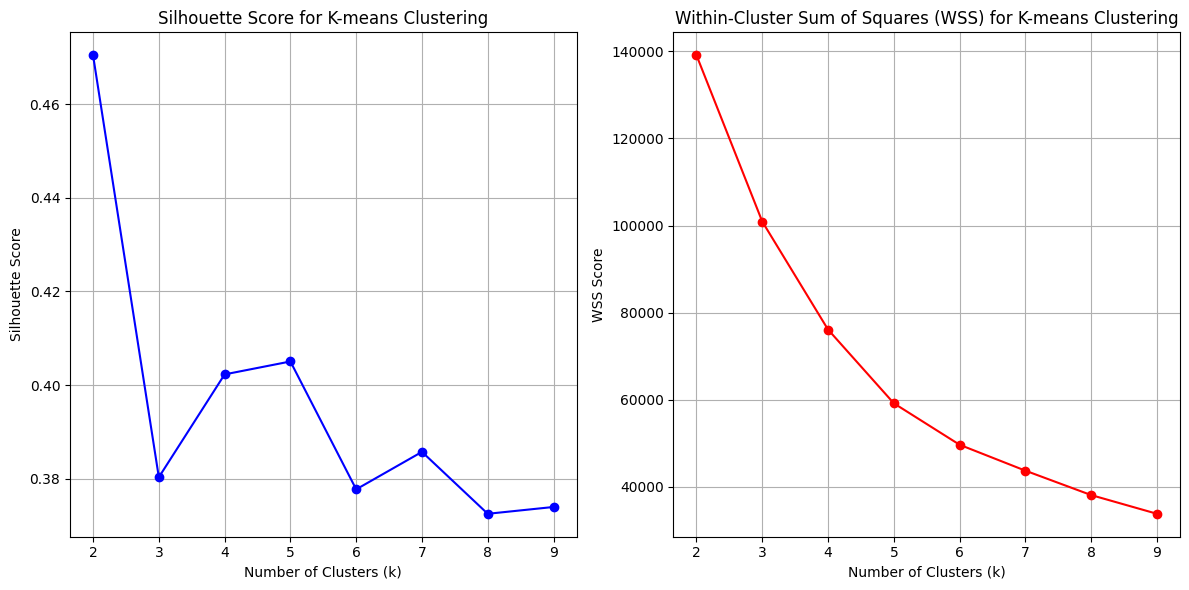

In [15]:
# TODO: Write your code here
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the CSV data
data = pd.read_csv('spotify.csv')

# Function to preprocess data (including encoding categorical variables)
def preprocess_data(data):
    # Encode categorical variables if present
    for column in data.columns:
        if data[column].dtype == 'object':
            data[column] = pd.factorize(data[column])[0]

    # Scale numeric features if needed (using StandardScaler)
    scaler = StandardScaler()
    data[data.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(data.select_dtypes(include=[np.number]))

    return data, scaler

# Preprocess the data
processed_data, scaler = preprocess_data(data)

# Extract features for clustering (assuming first two principal components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(processed_data)

# Initialize lists to store Silhouette scores and WSS scores
silhouette_scores = []
wss_scores = []

# Range of clusters to try
num_clusters_range = range(2, 10)

# Calculate Silhouette scores and WSS scores for each k
for k in num_clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)

    # Calculate Silhouette score
    silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

    # Calculate WSS (within-cluster sum of squares)
    wss_score = kmeans.inertia_
    wss_scores.append(wss_score)

# Plot Silhouette scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(num_clusters_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score for K-means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

# Plot WSS scores
plt.subplot(1, 2, 2)
plt.plot(num_clusters_range, wss_scores, marker='o', linestyle='-', color='r')
plt.title('Within-Cluster Sum of Squares (WSS) for K-means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WSS Score')
plt.grid(True)

plt.tight_layout()
plt.show()


# Checking Output

To see how good was our clustering we will use a sample check and t-SNE method.

first randomly select two song from every cluster and see how close these two songs are.

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the CSV data
data = pd.read_csv('spotify.csv')

# Function to preprocess data (including encoding categorical variables)
def preprocess_data(data):
    # Encode categorical variables if present
    for column in data.columns:
        if data[column].dtype == 'object':
            data[column] = pd.factorize(data[column])[0]

    # Scale numeric features if needed (using StandardScaler)
    scaler = StandardScaler()
    data[data.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(data.select_dtypes(include=[np.number]))

    return data, scaler

# Preprocess the data
processed_data, scaler = preprocess_data(data)

# Extract features for clustering (assuming first two principal components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(processed_data)

# Initialize K-means clustering with optimal k (determined previously)
k = 4  # Example: Replace with your optimal k value
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Add cluster labels to the original data
processed_data['Cluster'] = cluster_labels

# Function to randomly select two songs from each cluster
def select_two_songs_from_cluster(data, cluster_label):
    cluster_data = data[data['Cluster'] == cluster_label]
    sample_songs = cluster_data.sample(2)
    return sample_songs

# Initialize a list to store selected pairs
selected_pairs = []

# Select two songs from each cluster and measure similarity
for cluster_label in range(k):
    pair1 = select_two_songs_from_cluster(processed_data, cluster_label)
    pair2 = select_two_songs_from_cluster(processed_data, cluster_label)
    selected_pairs.append((pair1, pair2))

# Function to measure similarity (Euclidean distance) between pairs of songs
def measure_similarity(pair1, pair2):
    features = processed_data.columns[:-1]  # Exclude 'Cluster' column
    song1_features = pair1[features].values.reshape(1, -1)
    song2_features = pair2[features].values.reshape(1, -1)
    distance = pairwise_distances(song1_features, song2_features, metric='euclidean')
    return distance[0][0]

# Print and visualize similarity measures for selected pairs
for idx, (pair1, pair2) in enumerate(selected_pairs):
    similarity = measure_similarity(pair1, pair2)
    print(f"Cluster {idx + 1}:")
    print(f"  Song 1: {pair1['track_name'].values[0]} - {pair1['track_artist'].values[0]}")
    print(f"  Song 2: {pair2['track_name'].values[0]} - {pair2['track_artist'].values[0]}")
    print(f"  Similarity (Euclidean distance): {similarity:.2f}")
    print()




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
  Song 1: -0.9781101492384967 - -0.6515236910120965
  Song 2: -0.3189998754626592 - -0.007008768044716286
  Similarity (Euclidean distance): 9.46

Cluster 2:
  Song 1: 0.30414590293975763 - 0.48918815289659023
  Song 2: 0.47121602885771996 - -0.6941730735689503
  Similarity (Euclidean distance): 7.20

Cluster 3:
  Song 1: 1.0122595927224074 - -0.7018117689522674
  Song 2: 1.5070221525806613 - 1.7893577629320216
  Similarity (Euclidean distance): 8.89

Cluster 4:
  Song 1: -1.0563436730388462 - 1.1757159004722144
  Song 2: -0.19133308112912198 - 0.03786856733227167
  Similarity (Euclidean distance): 10.12



Using t-SNE reduce dimension of data pointe to 2D and plot it to check how good datapoints are clustered (implementing this part is optional and have extra points)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
  Song 1: -1.1703984073704912 - -0.9873080089037439
  Song 2: -0.08386944953523541 - 0.1865048483326502
  Similarity (Euclidean distance): 6.81

Cluster 2:
  Song 1: -0.2823189558786126 - 0.013361086310795977
  Song 2: -0.9484501869185841 - 0.0054041119531739994
  Similarity (Euclidean distance): 6.10

Cluster 3:
  Song 1: 1.6912864595536454 - -1.2517978365510984
  Song 2: 1.032319470619933 - 1.3097113486545688
  Similarity (Euclidean distance): 9.96

Cluster 4:
  Song 1: -0.07212009248097048 - 0.20560158679094295
  Song 2: -0.9643548043944793 - -0.6343366263996331
  Similarity (Euclidean distance): 9.78



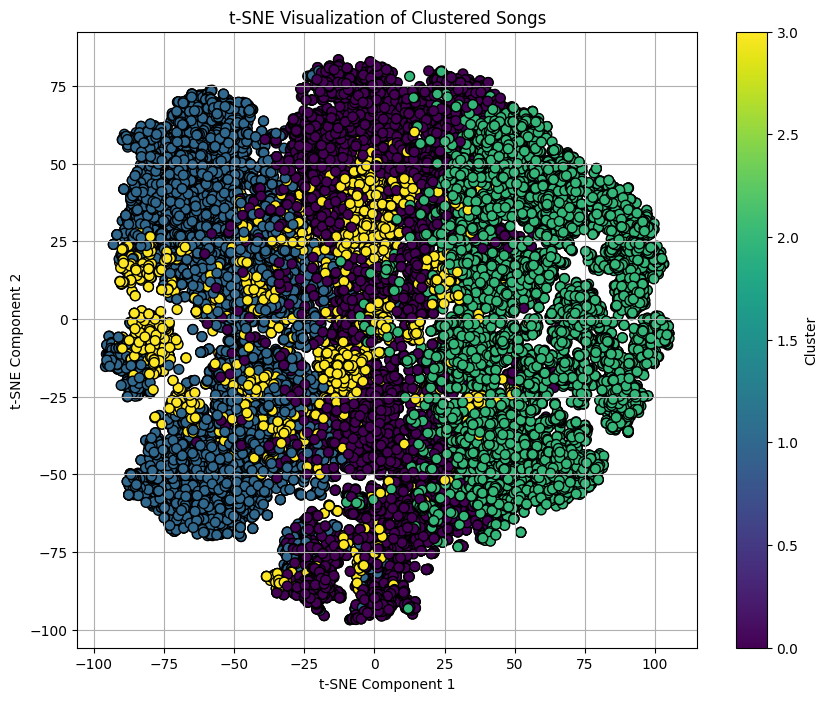

In [22]:
# TODO: Write your code here
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the CSV data
data = pd.read_csv('spotify.csv')

# Function to preprocess data (including encoding categorical variables)
def preprocess_data(data):
    # Encode categorical variables if present
    for column in data.columns:
        if data[column].dtype == 'object':
            data[column] = pd.factorize(data[column])[0]

    # Scale numeric features if needed (using StandardScaler)
    scaler = StandardScaler()
    data[data.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(data.select_dtypes(include=[np.number]))

    return data, scaler

# Preprocess the data
processed_data, scaler = preprocess_data(data)

# Extract features for clustering (assuming first two principal components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(processed_data)

# Initialize K-means clustering with optimal k (determined previously)
k = 4  # Example: Replace with your optimal k value
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Add cluster labels to the original data
processed_data['Cluster'] = cluster_labels

# Function to randomly select two songs from each cluster
def select_two_songs_from_cluster(data, cluster_label):
    cluster_data = data[data['Cluster'] == cluster_label]
    sample_songs = cluster_data.sample(2)
    return sample_songs

# Initialize a list to store selected pairs
selected_pairs = []

# Select two songs from each cluster and measure similarity
for cluster_label in range(k):
    pair1 = select_two_songs_from_cluster(processed_data, cluster_label)
    pair2 = select_two_songs_from_cluster(processed_data, cluster_label)
    selected_pairs.append((pair1, pair2))

# Function to measure similarity (Euclidean distance) between pairs of songs
def measure_similarity(pair1, pair2):
    features = processed_data.columns[:-1]  # Exclude 'Cluster' column
    song1_features = pair1[features].values.reshape(1, -1)
    song2_features = pair2[features].values.reshape(1, -1)
    distance = pairwise_distances(song1_features, song2_features, metric='euclidean')
    return distance[0][0]

# Print and visualize similarity measures for selected pairs
for idx, (pair1, pair2) in enumerate(selected_pairs):
    similarity = measure_similarity(pair1, pair2)
    print(f"Cluster {idx + 1}:")
    print(f"  Song 1: {pair1['track_name'].values[0]} - {pair1['track_artist'].values[0]}")
    print(f"  Song 2: {pair2['track_name'].values[0]} - {pair2['track_artist'].values[0]}")
    print(f"  Similarity (Euclidean distance): {similarity:.2f}")
    print()

# Dimensionality reduction with t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(processed_data.drop('Cluster', axis=1))

# Visualize t-SNE plot of clustered data
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Visualization of Clustered Songs')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()
